<a href="https://colab.research.google.com/github/Pravallika-Myneni/Data_science_pipeline/blob/main/pm_milestone_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

import plotly.express as px
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('/content/drive/MyDrive/income-mapped-zip-code.csv', index_col = [0])
df.head(2)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (2,3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Zipcode,Median_Income,Mean_Income,Age Group,Arrest Date,Arrest Key,Ofns Desc,Pd Desc,Perp Race,Perp Sex,Arrest Precinct,Lat,Lon,LatLon
0,10001,96787,166167,<18,3/24/2019,195084931,ROBBERY,"ROBBERY,OPEN AREA UNCLASSIFIED",BLACK,M,14,40.75,-73.99,"(40.75, -73.99)"
1,10001,96787,166167,25-44,7/11/2018,185049784,F.C.A. P.I.N.O.S.,"FUGITIVE,FROM OTHER STATES",WHITE,F,14,40.75,-73.99,"(40.75, -73.99)"


In [3]:
df_ = df.drop(columns = {'LatLon'}).rename(columns =  {col : col.replace(' ', '_') for col in df.columns if col not in ['Lat', 'Lon']})
df_['Arrest_Date'] = pd.to_datetime(df_.Arrest_Date)
df_['week'] = df_['Arrest_Date'].dt.week
df_['day'] = df_['Arrest_Date'].dt.day
df_['month'] = df_['Arrest_Date'].dt.month

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [4]:
df_.head(2)

,Zipcode,Median_Income,Mean_Income,Age_Group,Arrest_Date,Arrest_Key,Ofns_Desc,Pd_Desc,Perp_Race,Perp_Sex,Arrest_Precinct,Lat,Lon,week,day,month
0,10001,96787,166167,<18,2019-03-24,195084931,ROBBERY,"ROBBERY,OPEN AREA UNCLASSIFIED",BLACK,M,14,40.75,-73.99,12,24,3
1,10001,96787,166167,25-44,2018-07-11,185049784,F.C.A. P.I.N.O.S.,"FUGITIVE,FROM OTHER STATES",WHITE,F,14,40.75,-73.99,28,11,7


May be before clustering, we can rank the ofns_Desc and use that as one more attribute for clustering..

we can use other attributes as well here

# Clustering into high threat - medium threat and low threat zones

In [5]:
clustering_df = df_.copy()[['Zipcode', 'Arrest_Key']]
clustering_df_ = clustering_df.groupby(['Zipcode']).count()['Arrest_Key'].to_frame().reset_index()
clustering_df_['Zipcode'] = clustering_df_['Zipcode'].astype('str') 

In [6]:
clustering_df_.describe()

,Arrest_Key
count,193.000000
mean,3076.274611
std,3008.869490
min,2.000000
25%,709.000000
50%,2222.000000
75%,4528.000000
max,13235.000000


In [7]:
clustering_df_.head(2)

,Zipcode,Arrest_Key
0,10001,11357
1,10002,4775


Is there a point to do this.. convert to str then encode it?? For now, assuming no

In [8]:
"""from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

clustering_df_['Zipcode'] = le.fit_transform(clustering_df_['Zipcode'])

clustering_df_.head(2)"""

"from sklearn.preprocessing import LabelEncoder\n\nle = LabelEncoder()\n\nclustering_df_['Zipcode'] = le.fit_transform(clustering_df_['Zipcode'])\n\nclustering_df_.head(2)"

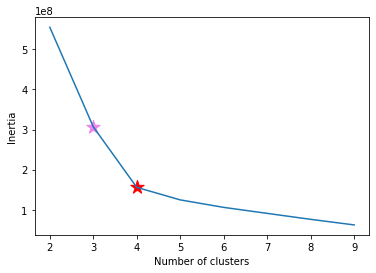

In [9]:
from sklearn.cluster import KMeans
X = np.array(clustering_df_)
inertias = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)
plt.plot(range(2,10), inertias)
plt.scatter(3,inertias[1], s = 200, c = 'violet', marker='*')
plt.scatter(4,inertias[2], s = 200, c = 'red', marker='*')
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.show()

In [10]:
##It gives an idea of how well the objects are classified taking that number of clusters
from sklearn.metrics import silhouette_score
for n_clusters in range(2,10):
    clusterer = KMeans (n_clusters=n_clusters)
    preds = clusterer.fit_predict(X)
    centers = clusterer.cluster_centers_

    score = silhouette_score (X, preds, metric='euclidean', n_jobs=-1)
    print ("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.6368779125486689)
For n_clusters = 3, silhouette score is 0.5686892638501928)
For n_clusters = 4, silhouette score is 0.552016451748841)
For n_clusters = 5, silhouette score is 0.44738944263612895)
For n_clusters = 6, silhouette score is 0.46733300594879035)
For n_clusters = 7, silhouette score is 0.4148725489693286)
For n_clusters = 8, silhouette score is 0.4818087467918963)
For n_clusters = 9, silhouette score is 0.4920621485538178)


Silhouetee score is takiing ages to calculate.. try again later?

In [11]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
pred = y_kmeans

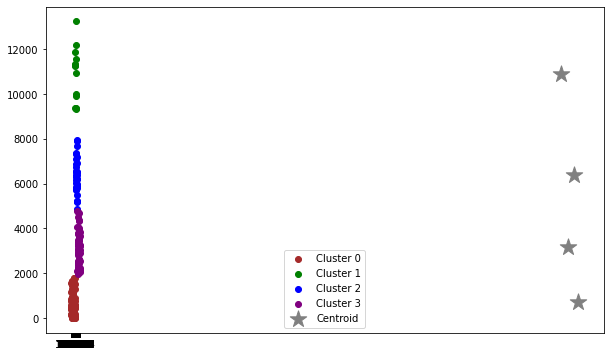

In [12]:
plt.figure(figsize=(10,6))
plt.scatter(X[pred == 0, 0], X[pred == 0, 1], c = 'brown', label = 'Cluster 0')
plt.scatter(X[pred == 1, 0], X[pred == 1, 1], c = 'green', label = 'Cluster 1')
plt.scatter(X[pred == 2, 0], X[pred == 2, 1], c = 'blue', label = 'Cluster 2')
plt.scatter(X[pred == 3, 0], X[pred == 3, 1], c = 'purple', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:, 1],s = 300, c = 'gray', label = 'Centroid', marker='*')
plt.legend()

In [13]:
clustering_df_.shape

(193, 2)

In [14]:
pred.shape

(193,)

In [15]:
clustering_df_['Label'] = pred
clustering_df_.head(5)

,Zipcode,Arrest_Key,Label
0,10001,11357,1
1,10002,4775,3
2,10003,4061,3
3,10004,423,0
4,10007,2088,3


In [16]:
clustering_df_[clustering_df_['Label'] ==0].describe()

,Arrest_Key,Label
count,91.000000,91.0
mean,732.395604,0.0
std,560.117902,0.0
min,2.000000,0.0
25%,191.000000,0.0
50%,589.000000,0.0
75%,1292.000000,0.0
max,1808.000000,0.0


In [17]:
clustering_df_[clustering_df_['Label'] ==1].describe()

,Arrest_Key,Label
count,13.000000,13.0
mean,10895.307692,1.0
std,1220.431507,0.0
min,9342.000000,1.0
25%,9890.000000,1.0
50%,11252.000000,1.0
75%,11541.000000,1.0
max,13235.000000,1.0


In [18]:
clustering_df_[clustering_df_['Label'] == 2].describe()

,Arrest_Key,Label
count,32.00000,32.0
mean,6364.06250,2.0
std,787.34437,0.0
min,4883.00000,2.0
25%,5852.50000,2.0
50%,6335.50000,2.0
75%,6876.75000,2.0
max,7927.00000,2.0


In [19]:
clustering_df_[clustering_df_['Label'] ==3].describe()

,Arrest_Key,Label
count,57.000000,57.0
mean,3189.192982,3.0
std,750.669378,0.0
min,1953.000000,3.0
25%,2559.000000,3.0
50%,3196.000000,3.0
75%,3664.000000,3.0
max,4775.000000,3.0


Label which is high threat .... low threat.. based on means may be?

In [20]:
all(clustering_df_.groupby(['Zipcode'])['Label'].nunique()==1)

True

In [21]:
zip_code_mapping = { row['Zipcode']: row['Label']  for i,row in clustering_df_.iterrows()}

## After clustering

In [22]:
mapping_ = df_.groupby(['Zipcode'])['Lat', 'Lon'].agg('min').reset_index()
mapping_["Label"] = mapping_['Zipcode'].apply(lambda x: zip_code_mapping[str(x)])
mapping_.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Zipcode,Lat,Lon,Label
0,10001,40.75,-74.00,1
1,10002,40.71,-73.99,3
2,10003,40.73,-73.99,3
3,10004,40.70,-74.02,0
4,10007,40.71,-74.01,3


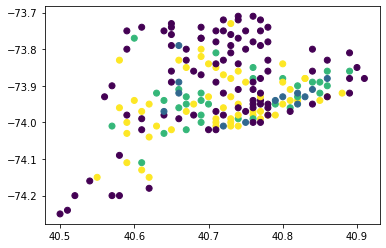

In [23]:
plt.scatter(mapping_['Lat'], mapping_['Lon'], c = mapping_['Label'])

## Data cleaning

In [24]:
timeseries_df = df_.copy()
timeseries_df['Threat_level']  = timeseries_df['Zipcode'].apply(lambda x: zip_code_mapping[str(x)])
timeseries_df['Mean_Income'] = timeseries_df['Mean_Income'].apply(lambda x: np.nan if x=='-' else x) 
timeseries_df['Median_Income'] = timeseries_df['Median_Income'].apply(lambda x: np.nan if x=='-' else x) 
timeseries_df.isna().sum()

Zipcode               0
Median_Income      5330
Mean_Income        5330
Age_Group             0
Arrest_Date           0
Arrest_Key            0
Ofns_Desc          1102
Pd_Desc            1102
Perp_Race             0
Perp_Sex              0
Arrest_Precinct       0
Lat                   0
Lon                   0
week                  0
day                   0
month                 0
Threat_level          0
dtype: int64

In [25]:
timeseries_df.shape

(593721, 17)

In [26]:
timeseries_df_ = timeseries_df.dropna(how='any', axis=0)
timeseries_df_.shape

(587306, 17)

## Time series?

In [27]:
timeseries_df_.dtypes

Zipcode                     int64
Median_Income              object
Mean_Income                object
Age_Group                  object
Arrest_Date        datetime64[ns]
Arrest_Key                  int64
Ofns_Desc                  object
Pd_Desc                    object
Perp_Race                  object
Perp_Sex                   object
Arrest_Precinct             int64
Lat                       float64
Lon                       float64
week                        int64
day                         int64
month                       int64
Threat_level                int64
dtype: object

In [31]:
timeseries_df_['Mean_Income'] = timeseries_df_['Mean_Income'].astype('str').apply(lambda x: x.replace('+', '')).astype('int')
timeseries_df_['Median_Income'] = timeseries_df_['Median_Income'].astype('str').apply(lambda x: x.replace('+', '').replace(',', '')).astype('int')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [40]:
cleaned_ts = timeseries_df_.groupby(['Arrest_Date'], as_index=False).agg({ 'Arrest_Key' : 'count', 'Threat_level' :  pd.Series.mode, 'Median_Income' : 'mean', 'Mean_Income' : 'mean'  }).rename(columns = {'Arrest_Key' : 'no_of_crimes'})
cleaned_ts

,Arrest_Date,no_of_crimes,Threat_level,Median_Income,Mean_Income
0,2018-01-01,443,2,64004.045147,90383.623025
1,2018-01-02,716,2,65683.243017,96267.202514
2,2018-01-03,894,2,65824.810962,96285.817673
3,2018-01-04,303,"[2, 3]",67733.504950,97996.623762
4,2018-01-05,523,2,67753.110899,99369.919694
...,...,...,...,...,...
1091,2020-12-27,306,3,63764.748366,90216.169935
1092,2020-12-28,377,2,64385.427056,98214.631300
1093,2020-12-29,404,1,70627.715347,111986.977723
1094,2020-12-30,467,2,64544.940043,96004.672377


In [64]:
cleaned_ts['Threat_level'] = cleaned_ts['Threat_level'].apply(lambda x: x if type(x)==np.int64 else int(np.average(tuple(x))))

In [65]:
cleaned_ts.head()

,Arrest_Date,no_of_crimes,Threat_level,Median_Income,Mean_Income
0,2018-01-01,443,2,64004.045147,90383.623025
1,2018-01-02,716,2,65683.243017,96267.202514
2,2018-01-03,894,2,65824.810962,96285.817673
3,2018-01-04,303,2,67733.504950,97996.623762
4,2018-01-05,523,2,67753.110899,99369.919694


In [66]:
cleaned_ts['Threat_level'].value_counts()

2    866
3    222
1      8
Name: Threat_level, dtype: int64

**What's the point of doing time series for threat_level =1**

,Arrest_Date,Threat_level,Zipcode,Median_Income,Mean_Income,Age_Group,Arrest_Key,Ofns_Desc,Pd_Desc,Perp_Race,Perp_Sex,Arrest_Precinct,Lat,Lon,week,day,month
0,2018-01-01,0,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79
1,2018-01-01,1,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95
2,2018-01-01,2,150,150,150,150,150,150,150,150,150,150,150,150,150,150,150
3,2018-01-01,3,119,119,119,119,119,119,119,119,119,119,119,119,119,119,119
4,2018-01-02,0,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4379,2020-12-30,3,158,158,158,158,158,158,158,158,158,158,158,158,158,158,158
4380,2020-12-31,0,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39
4381,2020-12-31,1,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72
4382,2020-12-31,2,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129


# Threat level wise timeseries

Should we do ts for each threat level or use threat level as a feature??

In [68]:
"""X_threat_level = []
y_threat_level = []

for threat_level in cleaned_ts['Threat_level'].unique():

  _df = cleaned_ts[cleaned_ts['Threat_level'] == threat_level]
  _df.drop(columns = ['Threat_level'])

"""


"X_threat_level = []\ny_threat_level = []\n\nfor threat_level in cleaned_ts['Threat_level'].unique():\n\n  _df = cleaned_ts[cleaned_ts['Threat_level'] == threat_level]\n  _df.drop(columns = ['Threat_level'])\n\n"